# NeoCarthago AI MODEL

### Model Workflow
1. **Data Preparation**: 
   - Load and clean the dataset, focusing on essential features related to network traffic properties.
   - Normalize numerical features to ensure consistent scaling, improving model performance and stability.

2. **Feature Selection and Preprocessing**:
   - Based on feature importance and domain knowledge, we select a subset of features that provide meaningful information for classification. This subset is then preprocessed, including normalization, to make the data model-ready.


3. **Model Training and Evaluation**:
   - Multiple machine learning models, including Random Forest, Logistic Regression, and Decision Tree are trained and evaluated to find the best-performing model.
   - Each model's accuracy, precision, recall, and F1 score are calculated and compared, providing insights into each model's effectiveness for network traffic classification.

4. **Confusion Matrix and Final Evaluation**:
   - A confusion matrix is generated for the best-performing model to analyze its prediction accuracy in detail, highlighting true positives, false positives, true negatives, and false negatives.


#### Step 1: Import Libraries and Load Data
In this initial step, we import essential libraries, including pandas for data manipulation, numpy for numerical operations, and sklearn for machine learning and feature scaling. We load our dataset, UNSW_NB15_training-set.csv, and display its structure to understand its composition and ensure successful data import.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv("Data/UNSW_NB15_training-set.csv")
df.head()


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


#### Step 2: Data Exploration
Here, we conduct an exploratory analysis of the data. This includes checking for missing values, viewing data types, and understanding the distribution of values for each feature. This step provides a clear picture of the data, informing us of any necessary preprocessing.

In [2]:
# Check for missing values
print("Missing values in each column:\n", df.isnull().sum())

# Data types of each column
print("\nData types:\n", df.dtypes)

# Basic statistics
df.describe()


Missing values in each column:
 id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,175341.000000,175341.000000,175341.000000,175341.000000,1.753410e+05,1.753410e+05,1.753410e+05,175341.000000,175341.000000,1.753410e+05,...,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000
mean,87671.000000,1.359389,20.298664,18.969591,8.844844e+03,1.492892e+04,9.540619e+04,179.546997,79.609567,7.345403e+07,...,5.383538,4.206255,8.729881,0.014948,0.014948,0.133066,6.955789,9.100758,0.015752,0.680622
std,50616.731112,6.480249,136.887597,110.258271,1.747656e+05,1.436542e+05,1.654010e+05,102.940011,110.506863,1.883574e+08,...,8.047104,5.783585,10.956186,0.126048,0.126048,0.701208,8.321493,10.756952,0.124516,0.466237
min,1.000000,0.000000,1.000000,0.000000,2.800000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,43836.000000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,3.278614e+01,62.000000,0.000000,1.305334e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,87671.000000,0.001582,2.000000,2.000000,4.300000e+02,1.640000e+02,3.225807e+03,254.000000,29.000000,8.796748e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000
75%,131506.000000,0.668069,12.000000,10.000000,1.418000e+03,1.102000e+03,1.250000e+05,254.000000,252.000000,8.888889e+07,...,5.000000,3.000000,12.000000,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000,1.000000
max,175341.000000,59.999989,9616.000000,10974.000000,1.296523e+07,1.465555e+07,1.000000e+06,255.000000,254.000000,5.988000e+09,...,51.000000,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000,1.000000


#### Step 3.1: Feature Selection and Engineering
Based on the correlation analysis, we select a subset of features that show a meaningful relationship with the target variable, label. We also consider domain knowledge and the distribution of features to finalize this selection.

In [3]:
# Select relevant features
selected_features = [
    'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 
    'sload', 'dload', 'sttl', 'dttl', 'sinpkt', 'dinpkt', 
    'sjit', 'djit', 'tcprtt', 'synack', 'ackdat', 
    'ct_srv_src', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_srv_dst', 
    'label'
]
df = df[selected_features]
df.head()


,dur,spkts,dpkts,sbytes,dbytes,sload,dload,sttl,dttl,sinpkt,...,sjit,djit,tcprtt,synack,ackdat,ct_srv_src,ct_dst_ltm,ct_src_dport_ltm,ct_srv_dst,label
0,0.121478,6,4,258,172,14158.942380,8495.365234,252,254,24.295600,...,30.177547,11.830604,0.000000,0.000000,0.000000,1,1,1,1,0
1,0.649902,14,38,734,42014,8395.112305,503571.312500,62,252,49.915000,...,61.426934,1387.778330,0.000000,0.000000,0.000000,43,1,1,6,0
2,1.623129,8,16,364,13186,1572.271851,60929.230470,62,252,231.875571,...,17179.586860,11420.926230,0.111897,0.061458,0.050439,7,2,1,6,0
3,1.681642,12,12,628,770,2740.178955,3358.622070,62,252,152.876547,...,259.080172,4991.784669,0.000000,0.000000,0.000000,1,2,1,1,0
4,0.449454,10,6,534,268,8561.499023,3987.059814,254,252,47.750333,...,2415.837634,115.807000,0.128381,0.071147,0.057234,43,2,2,39,0


#### Step 3.2: Feature Frequency Distribution Visualization
Before applying normalization, we examine the frequency distribution of each numerical feature. This provides insight into the range and skewness of values across features, allowing us to identify any that may benefit from normalization. The histograms below offer a compact visualization of each feature's distribution.

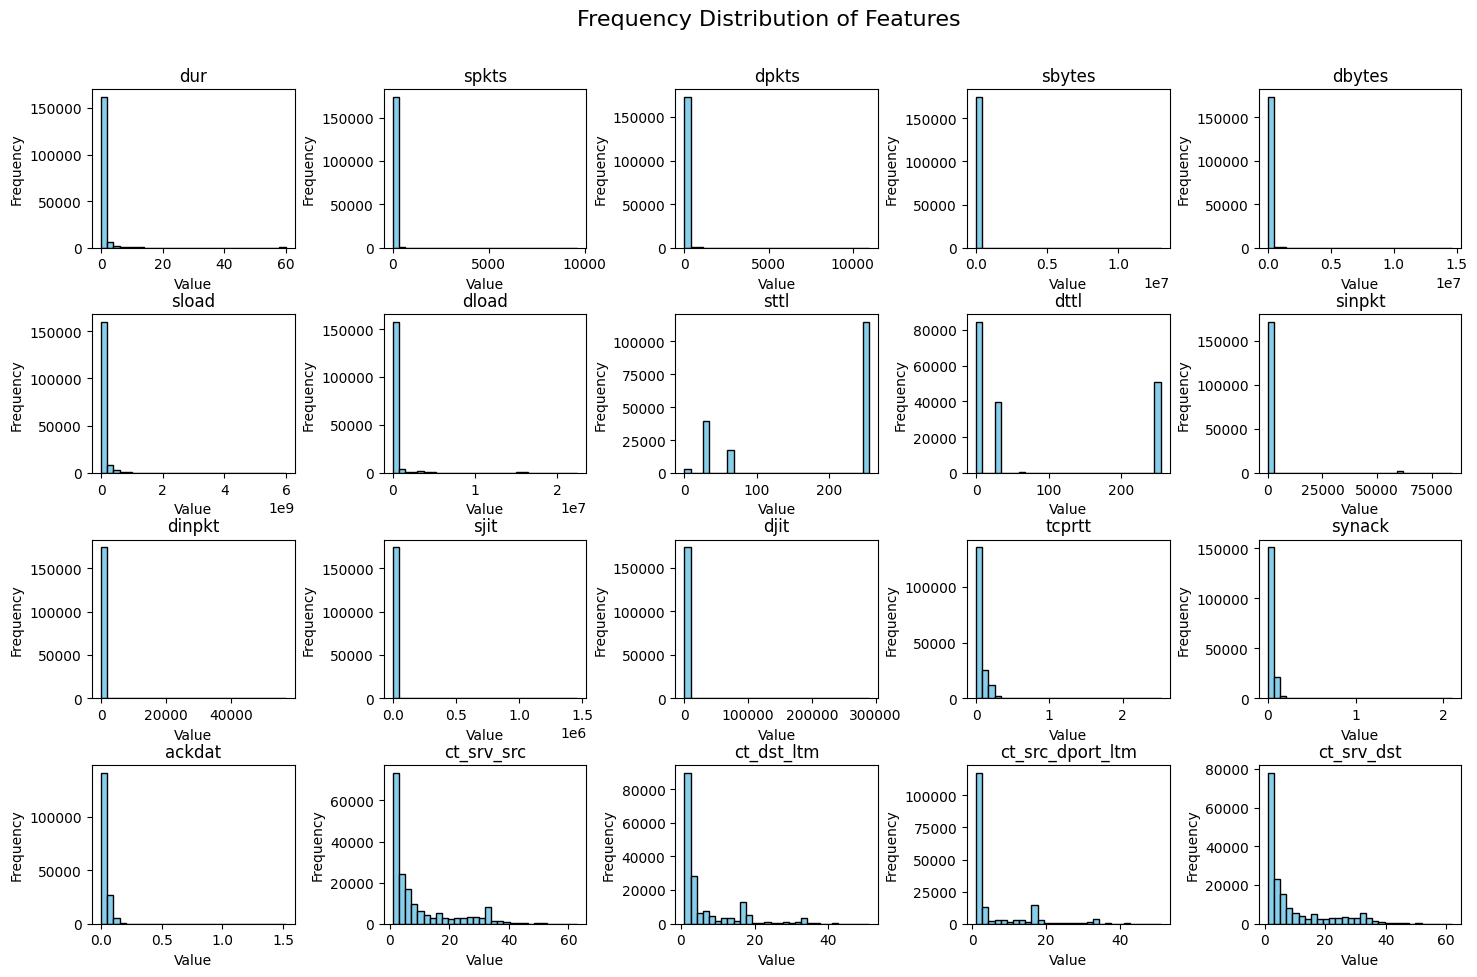

In [4]:
import matplotlib.pyplot as plt

# Normalize numerical features
numerical_features = [
    'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'sload', 'dload', 
    'sttl', 'dttl', 'sinpkt', 'dinpkt', 'sjit', 'djit', 
    'tcprtt', 'synack', 'ackdat', 'ct_srv_src', 'ct_dst_ltm', 
    'ct_src_dport_ltm', 'ct_srv_dst'
]

# Define the number of columns for the grid
num_cols = 5
num_features = len(numerical_features)
num_rows = (num_features // num_cols) + (num_features % num_cols > 0)

# Set up the figure size and layout
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 2.5))
fig.tight_layout(pad=3.0)

# Plot each feature in a histogram
for i, feature in enumerate(numerical_features):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]
    ax.hist(df[feature], bins=30, color="skyblue", edgecolor="black")
    ax.set_title(feature)
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")

# Hide any unused subplots in the grid
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes.flatten()[j])

plt.suptitle("Frequency Distribution of Features", fontsize=16)
plt.subplots_adjust(top=0.9)
plt.show()


#### Step 4: Data Preprocessing and Normalization
To improve model performance, we normalize all numerical features using Min-Max Scaling, bringing all values within a range of 0 to 1. This step reduces the impact of feature scales on model training and ensures consistent inputs.

In [5]:
# Normalize the data
scaler = MinMaxScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Display normalized data
df.head()


,dur,spkts,dpkts,sbytes,dbytes,sload,dload,sttl,dttl,sinpkt,...,sjit,djit,tcprtt,synack,ackdat,ct_srv_src,ct_dst_ltm,ct_src_dport_ltm,ct_srv_dst,label
0,0.002025,0.000520,0.000364,0.000018,0.000012,2.364553e-06,0.000379,0.988235,1.000000,0.000288,...,0.000021,0.000041,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0
1,0.010832,0.001352,0.003463,0.000054,0.002867,1.401989e-06,0.022458,0.243137,0.992126,0.000592,...,0.000042,0.004796,0.000000,0.000000,0.000000,0.677419,0.00,0.00,0.081967,0
2,0.027052,0.000728,0.001458,0.000026,0.000900,2.625704e-07,0.002717,0.243137,0.992126,0.002748,...,0.011763,0.039466,0.044423,0.029261,0.033164,0.096774,0.02,0.00,0.081967,0
3,0.028027,0.001144,0.001093,0.000046,0.000053,4.576117e-07,0.000150,0.243137,0.992126,0.001812,...,0.000177,0.017249,0.000000,0.000000,0.000000,0.000000,0.02,0.00,0.000000,0
4,0.007491,0.000936,0.000547,0.000039,0.000018,1.429776e-06,0.000178,0.996078,0.992126,0.000566,...,0.001654,0.000400,0.050967,0.033874,0.037632,0.677419,0.02,0.02,0.622951,0


#### Step 5: Train-Test Split
We split the dataset into training and testing sets using an 80-20 ratio. This ensures that we can evaluate model performance on unseen data and prevent overfitting.

In [6]:
# Separate features and target label
X = df.drop('label', axis=1)
y = df['label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Step 6: Model Training and Evaluation - Multiple Algorithms
We evaluate multiple algorithms, including Random Forest, Logistic Regression, and Decision Tree. For each algorithm, we train the model on the training data and calculate metrics on the test data, including accuracy, precision, recall, and F1 score. This comparison enables us to identify the most effective model.

In [7]:
# Define models to evaluate
models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
}

# Initialize results dictionary
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

# Display results
results_df = pd.DataFrame(results).T
print(results_df)


                     Accuracy  Precision    Recall  F1 Score
Random Forest        0.957569   0.956866  0.982008  0.969274
Logistic Regression  0.901651   0.900012  0.962636  0.930271
Decision Tree        0.947418   0.959922  0.963054  0.961485


#### Step 7: Visualization of Model Performance
The performance metrics for each model are plotted to visually compare their effectiveness. This step highlights the strengths and weaknesses of each algorithm, guiding our final model choice.

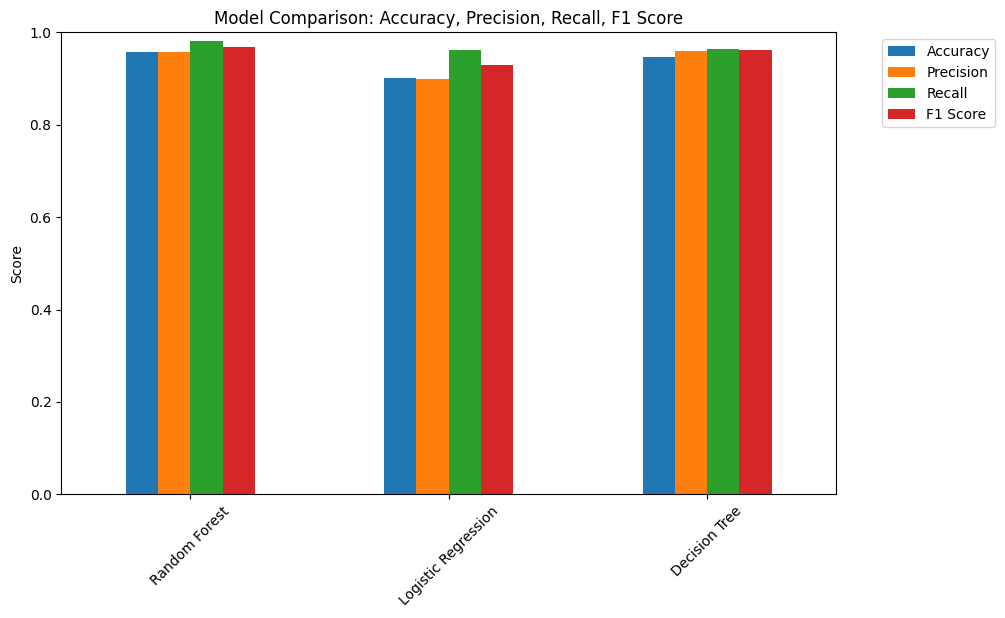

In [8]:
# Plotting the performance metrics for each model
results_df.plot(kind="bar", figsize=(10, 6), ylim=(0, 1))
plt.title("Model Comparison: Accuracy, Precision, Recall, F1 Score")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


#### Step 8: Confusion Matrix
To further analyze model performance, we generate a confusion matrix for the best-performing model. This matrix shows the counts of true positives, true negatives, false positives, and false negatives, offering insights into where the model may struggle.

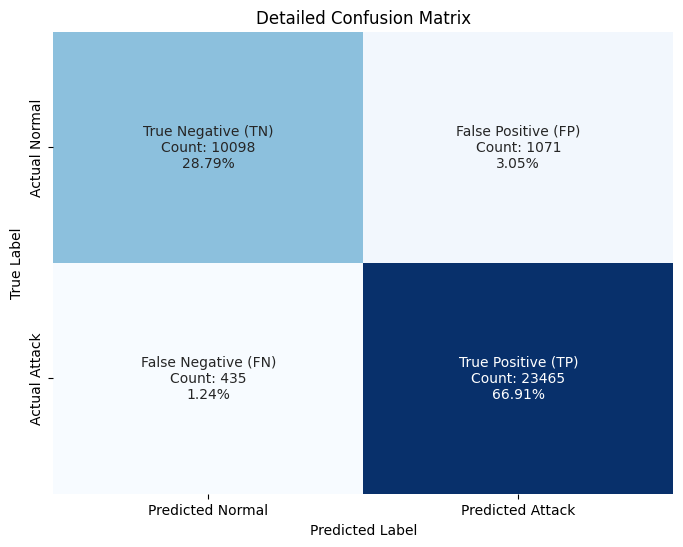

In [9]:
# Confusion matrix for the best model (Random Forest, if it's the best)
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_best)

# Define labels for each cell in the matrix
group_names = ["True Negative (TN)", "False Positive (FP)", "False Negative (FN)", "True Positive (TP)"]
group_counts = [f"{value}" for value in conf_matrix.flatten()]
group_percentages = [f"{value:.2%}" for value in conf_matrix.flatten() / np.sum(conf_matrix)]

# Combine the labels, counts, and percentages
labels = [f"{name}\nCount: {count}\n{percent}" for name, count, percent in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

# Plot the confusion matrix with enhanced labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=labels, fmt="", cmap="Blues", cbar=False,
            xticklabels=["Predicted Normal", "Predicted Attack"], 
            yticklabels=["Actual Normal", "Actual Attack"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Detailed Confusion Matrix")
plt.show()


#### Step 9: Using the UNSW_NB15 testing set to test the model performance

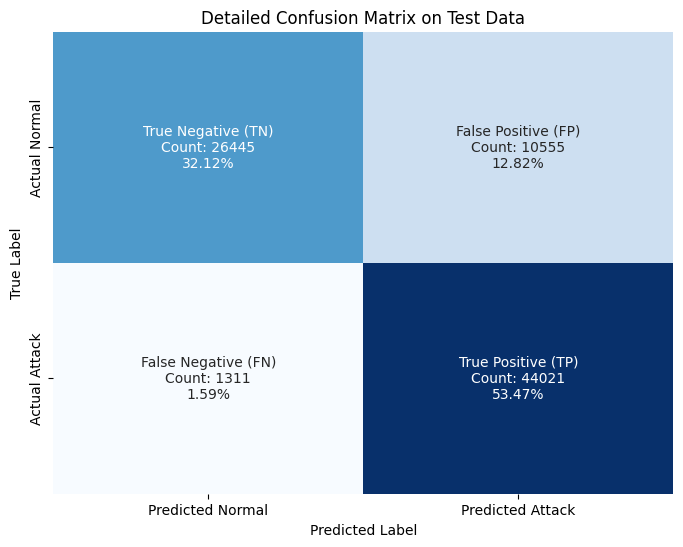

In [10]:
# Load and preprocess the UNSW_NB15_testing-set.csv
test_df = pd.read_csv("Data/UNSW_NB15_testing-set.csv")

# Ensure only the selected features are included, along with 'label'
test_df = test_df[selected_features]

# Separate features and target
X_test = test_df.drop('label', axis=1)
y_test = test_df['label']

# Apply the previously fitted scaler on the test data
# (Assuming 'scaler' was fitted on the training data)
X_test_scaled = scaler.transform(X_test)

# Predict on the scaled test data
y_pred_best = best_model.predict(X_test_scaled)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_best)

# Define labels for each cell in the matrix
group_names = ["True Negative (TN)", "False Positive (FP)", "False Negative (FN)", "True Positive (TP)"]
group_counts = [f"{value}" for value in conf_matrix.flatten()]
group_percentages = [f"{value:.2%}" for value in conf_matrix.flatten() / np.sum(conf_matrix)]

# Combine the labels, counts, and percentages
labels = [f"{name}\nCount: {count}\n{percent}" for name, count, percent in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

# Plot the confusion matrix with enhanced labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=labels, fmt="", cmap="Blues", cbar=False,
            xticklabels=["Predicted Normal", "Predicted Attack"], 
            yticklabels=["Actual Normal", "Actual Attack"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Detailed Confusion Matrix on Test Data")
plt.show()


#### Step 10: Save Model and Scaler
Finally, we save the trained model and scaler to a file using joblib. This enables us to load the model in future applications without retraining it.

In [ ]:
import joblib

# Save the best model with the scaler
model_data = {
    'model': best_model,
    'scaler': scaler
}
joblib.dump(model_data, 'model_and_scaler.joblib')


['model_and_scaler.joblib']